Notebook criado para praticar a limpeza e tratamento de dados do curso de Data Science do Prof Fernando Amaral, para isso algumas regras foram estabelicidas:

1- Aparência de ser: sol, nublado, chuva

2- Temperatura: -130f ~ 130f

3 - Umidade : 0 ~ 100

4 - Jogar: sim/nao

Deve ser indentificado e tratatado qualquer coisa diferente disso.

In [ ]:
import pandas as pd
import seaborn as srn
import statistics  as sts


In [ ]:
dados = pd.read_csv("tempo.csv", sep = ";")
dados.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [ ]:
dados.shape

(14, 5)

In [ ]:
agrupado = dados.groupby(['Aparencia']).size()
agrupado

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

In [ ]:
dados.isnull().sum() # indentificando os valores nulos

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [ ]:
dados.loc[dados['Aparencia'] ==  'menos', 'Aparencia'] = "sol" # substituindo menos pela moda sol
agrupado = dados.groupby(['Aparencia']).size()
agrupado

Aparencia
chuva      5
nublado    3
sol        6
dtype: int64

In [ ]:
agrupado2 = dados.groupby(['Vento']).size() # Indentificando o valores para a coluna vento, não tem irregularidades, mas sabemos que tem um valor NAN
agrupado2

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [ ]:
dados['Vento'].fillna('FALSO', inplace=True) # Substituindo o valor NAN por Falso que é a moda
dados['Vento'].isnull().sum()

0

In [ ]:
dados['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Temperatura')

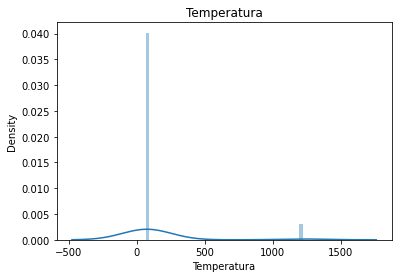

In [ ]:
srn.distplot(dados['Temperatura']).set_title('Temperatura')

In [ ]:
dados.loc[(dados['Temperatura']> 130)] # filtrando temp acima de 130 F


,Aparencia,Temperatura,Umidade,Vento,Jogar
7,sol,1220,95.0,FALSO,nao


In [ ]:
dados.loc[(dados['Temperatura']< -130)] # Filtrando temperaturas abaixo de - 130

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [ ]:
mediana_temp = sts.median(dados['Temperatura']) #calculando a mediana
mediana_temp

73.5

In [ ]:
dados.loc[(dados['Temperatura']> 130), 'Temperatura'] = mediana_temp # Substituindo pelo mediana

In [ ]:
dados.loc[(dados['Temperatura']> 130)] # verificando a substituição

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [ ]:
agrupado3 = dados.groupby(['Umidade']).size() # verificando a umidade, tem que ficar de 0 a 100, logo temos que substituir o valor de 
agrupado3 #200

Umidade
65.0     1
70.0     3
75.0     1
80.0     1
85.0     1
86.0     1
90.0     2
91.0     1
95.0     1
200.0    1
dtype: int64

In [ ]:
mediana_umidade = sts.median(dados["Umidade"])# calculando a medianad a umidade
mediana_umidade

85.5

In [ ]:
dados.loc[(dados['Umidade']> 130), 'Umidade'] = mediana_umidade # substituindo valor acima de 130 pelo mediana

In [ ]:
dados['Umidade'].fillna(mediana_umidade, inplace=True) # Substituindo o valor NAN pela mediana
dados['Umidade'].isnull().sum()

0

In [ ]:
agrupado3 = dados.groupby(['Umidade']).size() # verificando a substituição da temperatura alta
agrupado3

Umidade
65.0    1
70.0    3
75.0    1
80.0    1
85.0    1
85.5    2
86.0    1
90.0    2
91.0    1
95.0    1
dtype: int64

In [ ]:
agrupado4 = dados.groupby(['Jogar']).size() #Aqui esta tudo certo, sem valores fora do esperado
agrupado4

Jogar
nao    5
sim    9
dtype: int64

In [ ]:
dados.head() # tudo certo com a base de dados

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.0,85.0,FALSO,nao
1,sol,80.0,90.0,VERDADEIRO,nao
2,nublado,83.0,86.0,FALSO,sim
3,chuva,70.0,85.5,FALSO,sim
4,chuva,68.0,80.0,FALSO,sim
